# General Expressions for Acid-Base Titrations of Arbitrary Mixtures

A notebook based on the work presented in http://doi.org/10/cs2788 for the degree of protonation for arbitrary polyprotic acids.

The mole fraction of each species is given by the expression,

$$
\chi_{H_mA} = \frac{[H]^m K_1 K_2 ... K_{n-m} }
{[H]^n + [H]^{n-1}K_1 + [H]^{n-2}K_1K_2 + ... + K_1K_2...K_n}
$$
where $m = 1, 2, ... n$ are indices of each of the $n$ equilibrium constants.

## Tasks

This notebook contains a number of _tasks_. The first one is:

- [ ] Insert a video that illustrates what a polyprotic acid is.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from cryptography.fernet import Fernet
import base64


def encrypt(string, key):
    def keygen(x):
        return base64.urlsafe_b64encode(x.encode() + b" " * (32 - len(x)))

    cipher = Fernet(keygen(key))
    return cipher.encrypt(string.encode())


def decrypt(string, key):
    def keygen(x):
        return base64.urlsafe_b64encode(x.encode() + b" " * (32 - len(x)))

    cipher = Fernet(keygen(key))
    return print(cipher.decrypt(string.encode()).decode())


# Here you may add poly-protic acids, their binding constants, as well
# as their charge in the fully de-protonated form.
data = {
    "o-phosphate": dict(Z=-3, pK=np.array([2.12, 7.21, 12.67])),
    "citrate": dict(Z=-3, pK=np.array([3.13, 4.76, 6.39])),
    "STPP": dict(Z=-5, pK=np.array([1.0, 2.2, 2.3, 5.7, 8.5])),
    "SPP": dict(Z=-4, pK=np.array([0.91, 2.1, 6.7, 9.32])),
}

pHrange = np.arange(0, 14, 0.05)  # pH range to plot


def xhi(m, pH, pK):
    """
    Mole fraction for the m'th specie (Eq. 23 in doi:10/cs2788)

    Parameters
    ----------
    m : number
        The species index to calculate the degree of protonation for. Starting at 0.
    pH : value
        The pH value
    pK : array-like
        Array of acid-dissociation constants

    Returns
    -------
    value
        Mole fraction for species m
    """
    n = len(pK)
    assert (n > 0) & (m < n)
    H = 10.0 ** (-pH)
    K = 10.0 ** (-pK)
    numerator = H**m * K[0 : n - m].prod()
    denominator = H**n + sum(
        [H ** (n - (i + 1)) * K[0 : i + 1].prod() for i in range(n)]
    )
    return numerator / denominator

## Mole fractions

This shows the mole fractions for each protonation state as a function of pH.

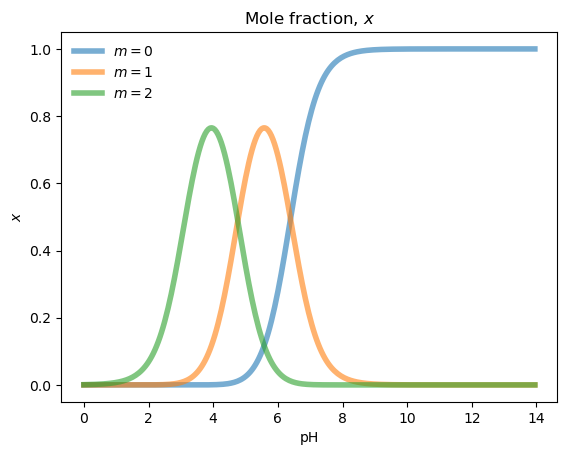

In [2]:
pKa = data["citrate"]["pK"]
for m in np.arange(len(pKa)):
    x = [xhi(m, pH, pKa) for pH in pHrange]
    plt.plot(pHrange, x, label=f"$m={m}$", lw=4, alpha=0.6)
plt.title("Mole fraction, $x$")
plt.xlabel("pH")
plt.ylabel(r"$x$")
plt.legend(frameon=False, loc=0)
plt.show()

## Total charge vs. pH

Here we use the mole fractions for each species to calculate the net-charge as a function of pH.

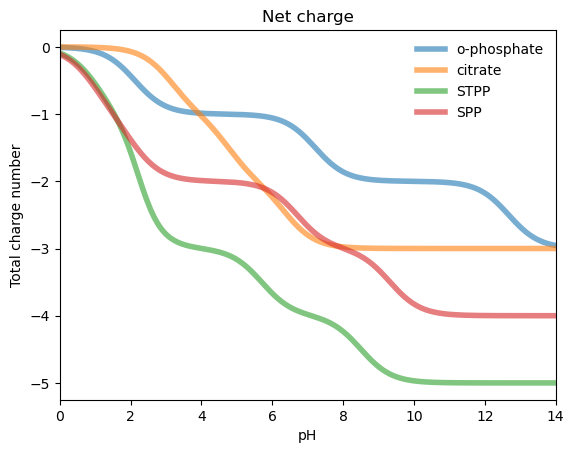

In [3]:
def net_charge(pH, pKa, Z_deprot):
    """
    Calculates the net charge for a given pH

    Parameters:
    -----------
    pKa: array-like
        pKa values
    pH: value
        Single pH value
    Z_deprot: value
        Charge of the fully depretonated species, e.g. -2 for "H2SO4"
    """
    charges = np.arange(Z_deprot, Z_deprot + 1 + len(pKa))
    m = np.arange(len(pKa))
    return sum([charge * xhi(m, pH, pKa) for charge, m in zip(charges, m)])


for name, d in data.items():
    plt.plot(
        pHrange,
        [net_charge(pH, d["pK"], d["Z"]) for pH in pHrange],
        lw=4,
        alpha=0.6,
        label=name,
    )

plt.title("Net charge")
plt.xlabel("pH")
plt.ylabel("Total charge number")
plt.xlim(0, 14)
plt.legend(frameon=False, loc=0)
plt.show()

## Capacitance vs. pH

We now calculate and plot the first derivative of the above plot with respect to pH.
This property is sometimes called the _capacitance_. For more information, see e.g.
https://doi.org/10/m9t.

## Tasks
- [ ] Make a documented function for the capacitance, similar to `xhi()` and `net_charge()` above.
- [ ] Fix the plot to show labels, title, legend. Use $\LaTeX$ math for mathematical symbols.
- [ ] Once your function is working, try to see if you can get rid of one or both of the `for` loops.
- [ ] Try other predefined color-schemes from matplotlib.

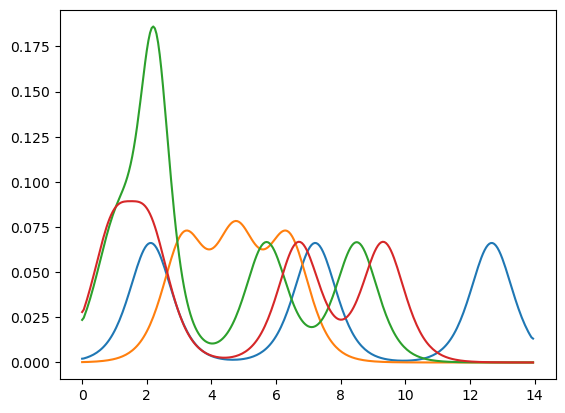

In [4]:
for name, d in data.items():
    Zrange = []
    for pH in pHrange:
        valence = d["Z"]
        pK = d["pK"]
        Z = 0
        for m in np.arange(len(pK)):
            Z = Z + valence * xhi(m, pH, pK)
            valence = valence + 1.0
        Zrange.append(Z)
    plt.plot(pHrange, -np.gradient(Zrange) * np.log(10))
plt.show()

## Degree of ionization

### Tasks

- [ ] Make a function for the degree of ionization, $\alpha$, then plot $\alpha(m, pH)$ for one of the anions listed in `data`.
- [ ] Export the figure to a PNG file using matplotlib.

In [5]:
# Your code goes here...

## Fit $pK_a$-values to a data set

Using potentiometric titration, we have measured the charge of an unknown acid as a function of pH.
We know that the acid contains two carboxylic acids with unknown pKa-values.
This is the measured dataset:

~~~
pH = np.array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. , 4.2, 4.4,
       4.6, 4.8, 5. , 5.2, 5.4, 5.6, 5.8, 6. , 6.2, 6.4, 6.6, 6.8, 7. ,
       7.2, 7.4, 7.6, 7.8, 8. , 8.2, 8.4, 8.6, 8.8, 9. , 9.2, 9.4, 9.6,
       9.8])
charge = np.array([-0.00892251, -0.19906726, -0.07318186, -0.45135695, -0.35689039,
       -0.34357198, -0.58084785, -0.73032804, -0.98198044, -1.07933099,
       -0.98629951, -1.10945957, -1.08232837, -1.34403003, -1.26260445,
       -1.36343965, -1.56893205, -1.63979125, -1.79007162, -1.87799169,
       -1.85226549, -1.84454079, -2.04160281, -1.9169051 , -1.9202188 ,
       -1.85042244, -1.88068151, -1.8823092 , -1.84217402, -1.80593163,
       -1.96329732, -1.86040253, -2.26568827, -2.16527866, -1.80354804,
       -2.23790013, -1.95906972, -2.02706678, -1.87359903, -2.03300883])
 ~~~

### Tasks

- [ ] Plot the data
- [ ] Fit the data to obtain the two pKa values. See e.g. `scipy.optimize.curve_fit`.
- [ ] Spline the data and plot the _capacitance_. See e.g. `scipy.interpolate.UnivariateSpline`

In [6]:
# Your code here...

In [7]:
# Possible answer (password hint: japanese place times two...)
decrypt(
    "gAAAAABkhhK0TxIqDi9so8CfGCDDftILnjtyhyeAKtOw7D4MEsuG2Ywot66VpM7meKnUHPZF_F_8P0wRc0Lkygk177iqZM4K7U8y6uz8IyqHLw89e1JGBpcvke-JDnvWGnRz5YqnWD7eeUwSAB8cw0AD9mZ4PQ_l8nbYOzha5-KiR10Rn5sjGvlab5mXtXfbKOc-2KvlvI4MDFC-Txuys0Ayn8UqoO3vk-z9se9SMrFQTFwE4j-CwBiq1Lz75SX1u8N2VTbHw0lMi9UTcGbO6TxBVSV385plYUdXeBRRx6BcVfFakBhMiNDyS5ut5K5VoSQgLFcIkZpCje0xo3_k5QckFLZzP5HWi5g5QM44JSJbN3byrIsbQi0-HrOvP9S4U0dZV2CNdhBeBMePOZQbME9xQR8uk-pUEQrQQd9I0clrKH7J5PTfXna6a4tDIM0UpJNUG36_hJ87DmOfbrLgt4Wccupj9hyJnAKiIAnYfyGeE4RaqdycNnoicr2kT2dnyHRclVnxNP47ljzV1AxFN9PuPs_LI9g5hzwjOW2CuRPfLN2d9uuByeTr4PyACswMoA63mSaNCGDRwJUNK_8jarGXrguxIjigyXyq1CS-INCDJubsPFKKLTNg2I7sqEQv12lPA5kznPHT0IGF8wgro-3YZsqRzQSIgw==",
    "enter_secret_pass_word",
)

InvalidToken: 